In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
import joblib

/tmp/ipython-input-1813086878.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1813086878.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

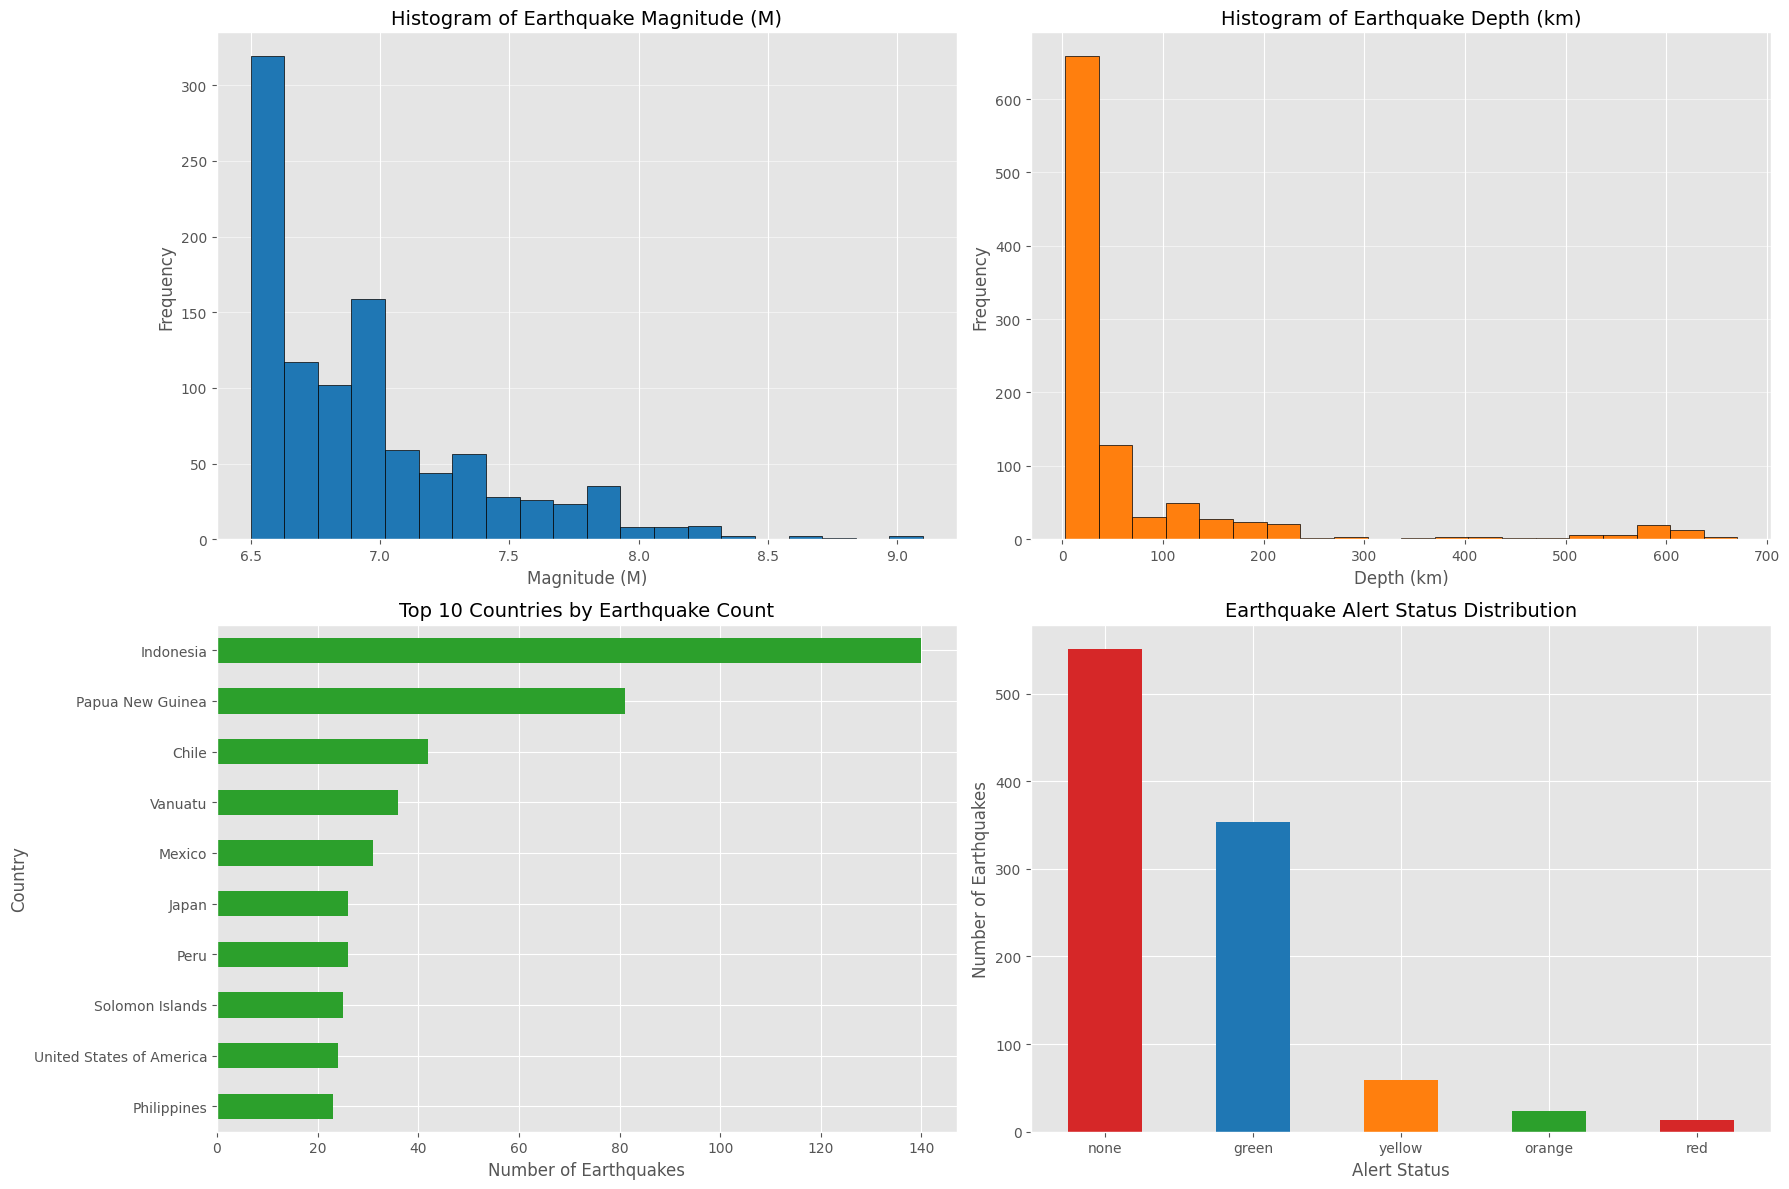

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_name = "earthquake_1995-2023.csv"
df = pd.read_csv(file_name)

date_format = '%d-%m-%Y %H:%M'
df['date_time'] = pd.to_datetime(df['date_time'], format=date_format, errors='coerce')
df.dropna(subset=['date_time'], inplace=True)

df['alert'].fillna('none', inplace=True)
df['country'].fillna('Unknown', inplace=True)



plt.figure(figsize=(18, 12))
plt.style.use('ggplot')

plt.subplot(2, 2, 1)
df['magnitude'].hist(bins=20, edgecolor='black', color='#1f77b4')
plt.title('Histogram of Earthquake Magnitude (M)', fontsize=14)
plt.xlabel('Magnitude (M)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)


plt.subplot(2, 2, 2)
df['depth'].hist(bins=20, edgecolor='black', color='#ff7f0e')
plt.title('Histogram of Earthquake Depth (km)', fontsize=14)
plt.xlabel('Depth (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)


country_counts = df['country'].value_counts()
top_10_countries = country_counts[country_counts.index != 'Unknown'].head(10)

plt.subplot(2, 2, 3)
top_10_countries.sort_values(ascending=True).plot(kind='barh', color='#2ca02c')
plt.title('Top 10 Countries by Earthquake Count', fontsize=14)
plt.xlabel('Number of Earthquakes', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()

alert_counts = df['alert'].value_counts().sort_values(ascending=False)

plt.subplot(2, 2, 4)
alert_counts.plot(kind='bar', color=['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Earthquake Alert Status Distribution', fontsize=14)
plt.xlabel('Alert Status', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("earthquake_histograms_bar_graphs.png")

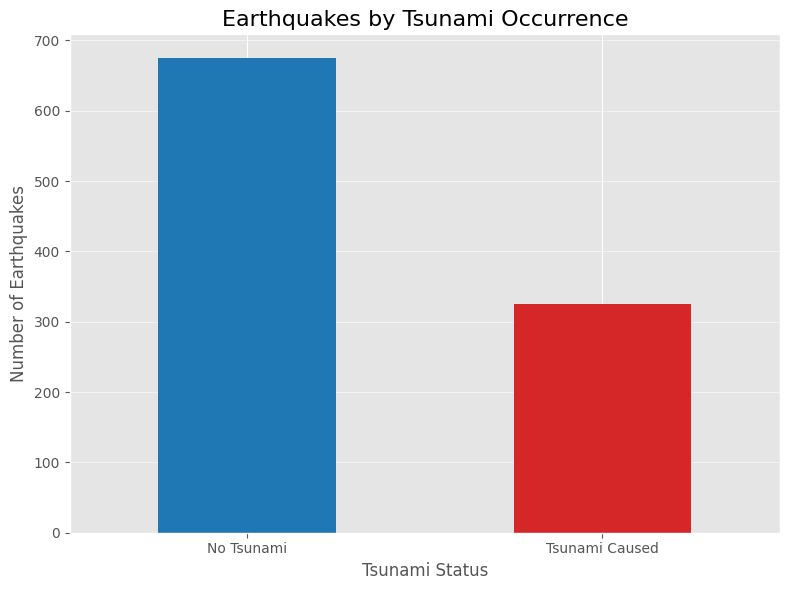

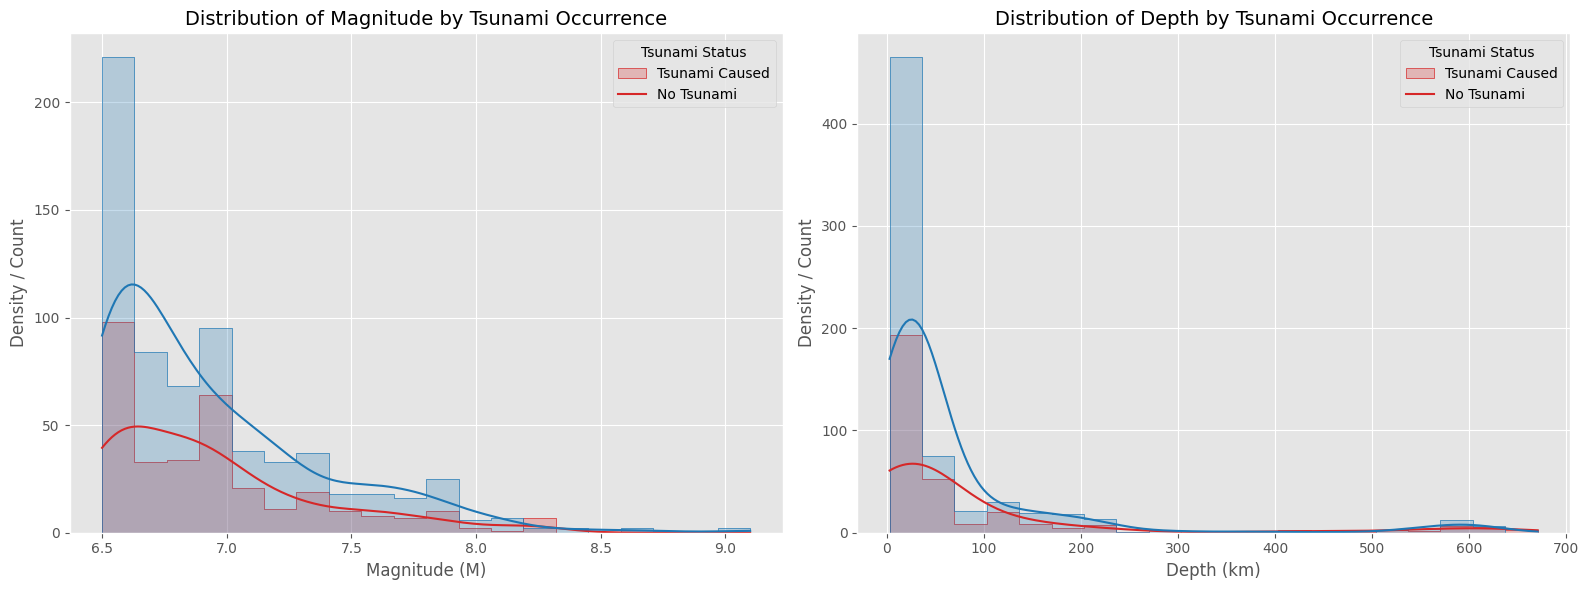

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_name = "earthquake_1995-2023.csv"
df = pd.read_csv(file_name)

date_format = '%d-%m-%Y %H:%M'
df['date_time'] = pd.to_datetime(df['date_time'], format=date_format, errors='coerce')
df.dropna(subset=['date_time'], inplace=True)


df['tsunami_occurrence'] = df['tsunami'].apply(lambda x: 'Tsunami Caused' if x == 1 else 'No Tsunami')


plt.figure(figsize=(8, 6))
tsunami_counts = df['tsunami_occurrence'].value_counts()
tsunami_counts.plot(kind='bar', color=['#1f77b4', '#d62728'])

plt.title('Earthquakes by Tsunami Occurrence', fontsize=16)
plt.xlabel('Tsunami Status', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig("tsunami_bar_chart.png")


plt.figure(figsize=(16, 6))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)

sns.histplot(data=df, x='magnitude', hue='tsunami_occurrence', element='step', kde=True, bins=20, palette={'Tsunami Caused': '#d62728', 'No Tsunami': '#1f77b4'})
plt.title('Distribution of Magnitude by Tsunami Occurrence', fontsize=14)
plt.xlabel('Magnitude (M)', fontsize=12)
plt.ylabel('Density / Count', fontsize=12)
plt.legend(title='Tsunami Status', labels=['Tsunami Caused', 'No Tsunami'])


plt.subplot(1, 2, 2)
sns.histplot(data=df, x='depth', hue='tsunami_occurrence', element='step', kde=True, bins=20, palette={'Tsunami Caused': '#d62728', 'No Tsunami': '#1f77b4'})
plt.title('Distribution of Depth by Tsunami Occurrence', fontsize=14)
plt.xlabel('Depth (km)', fontsize=12)
plt.ylabel('Density / Count', fontsize=12)
plt.legend(title='Tsunami Status', labels=['Tsunami Caused', 'No Tsunami'])
plt.tight_layout()

plt.savefig("tsunami_comparative_plots.png")

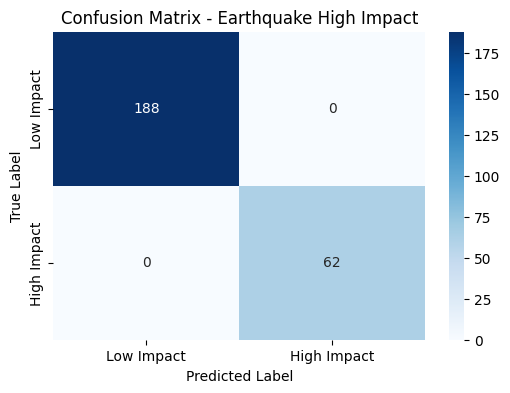

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px


y_pred_high = best_high.named_steps['classifier'].predict(X_test_high_impact)


cm_eq = confusion_matrix(y_test_high_impact, y_pred_high)
plt.figure(figsize=(6,4))
sns.heatmap(cm_eq, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low Impact","High Impact"],
            yticklabels=["Low Impact","High Impact"])
plt.title("Confusion Matrix - Earthquake High Impact")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


fig_eq = px.scatter_geo(
    df,
    lat="latitude",
    lon="longitude",
    color="magnitude",
    size="magnitude",
    hover_name="location",
    projection="natural earth",
    title="Worldwide Earthquake Distribution (1995-2023)",
    color_continuous_scale="Turbo",
    size_max=15,
)
fig_eq.show()


fig_tsunami = px.scatter_geo(
    df[df["tsunami"] == 1],
    lat="latitude",
    lon="longitude",
    color="magnitude",
    size="magnitude",
    hover_name="location",
    projection="natural earth",
    title="Worldwide Tsunami-Linked Earthquakes",
    color_continuous_scale="Plasma",
    size_max=20,
    symbol_sequence=["x"]
)
fig_tsunami.show()

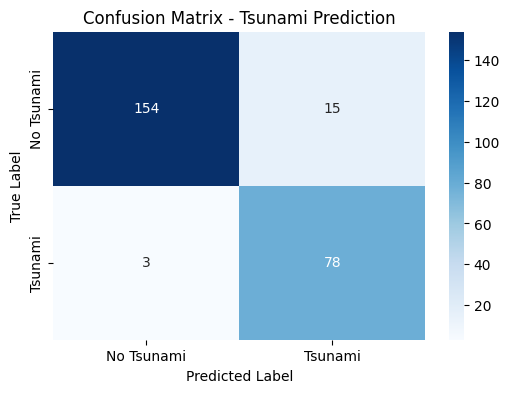

              precision    recall  f1-score   support

  No Tsunami       0.98      0.91      0.94       169
     Tsunami       0.84      0.96      0.90        81

    accuracy                           0.93       250
   macro avg       0.91      0.94      0.92       250
weighted avg       0.93      0.93      0.93       250



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

X_test_processed = best_tsun.named_steps['preprocessor'].transform(X_test)
y_pred = best_tsun.named_steps['classifier'].predict(X_test_processed)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tsunami","Tsunami"], yticklabels=["No Tsunami","Tsunami"])
plt.title("Confusion Matrix - Tsunami Prediction")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


report = classification_report(y_test, y_pred, target_names=["No Tsunami","Tsunami"])
print(report)

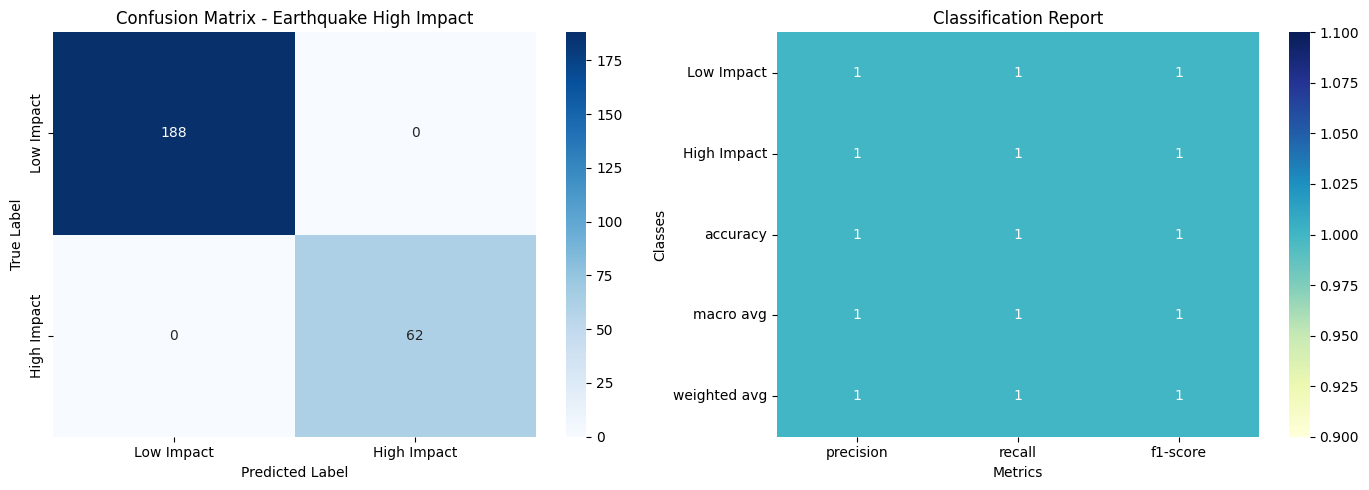

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

y_pred_high = best_high.named_steps['classifier'].predict(X_test_high_impact)


cm_eq = confusion_matrix(y_test_high_impact, y_pred_high)

report = classification_report(
    y_test_high_impact,
    y_pred_high,
    target_names=["Low Impact", "High Impact"],
    output_dict=True
)


fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_eq, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low Impact", "High Impact"],
            yticklabels=["Low Impact", "High Impact"],
            ax=ax[0])
ax[0].set_title("Confusion Matrix - Earthquake High Impact")
ax[0].set_ylabel("True Label")
ax[0].set_xlabel("Predicted Label")


report_df = pd.DataFrame(report).iloc[:-1, :].T
sns.heatmap(report_df, annot=True, cmap="YlGnBu", ax=ax[1])
ax[1].set_title("Classification Report")
ax[1].set_xlabel("Metrics")
ax[1].set_ylabel("Classes")

plt.tight_layout()
plt.show()


Milestone 1

In [ ]:

import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
import joblib


DATA_PATH = "/content/earthquake_1995-2023.csv"
df = pd.read_csv(DATA_PATH)


for col in ["alert", "continent", "country", "location", "magType", "net"]:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")


df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce", dayfirst=True)


df["year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month
df["day"] = df["date_time"].dt.day
df["hour"] = df["date_time"].dt.hour
df["day_of_week"] = df["date_time"].dt.dayofweek


for col in ["magnitude", "depth", "latitude", "longitude", "gap", "dmin", "cdi", "mmi", "sig", "tsunami"]:
    if col not in df.columns:
        df[col] = np.nan


df["log_depth"] = np.log1p(df["depth"].fillna(0))
df["energy_release"] = 10 ** (1.5 * df["magnitude"].fillna(df["magnitude"].median()) + 4.8)
df["is_shallow"] = (df["depth"] < 70).astype(int).fillna(0)
df["abs_latitude"] = df["latitude"].abs()
df["abs_longitude"] = df["longitude"].abs()

df["cdi"] = df["cdi"].fillna(df["cdi"].median() if df["cdi"].notna().any() else 0)
df["mmi"] = df["mmi"].fillna(df["mmi"].median() if df["mmi"].notna().any() else 0)
df["sig"] = df["sig"].fillna(df["sig"].median() if df["sig"].notna().any() else 0)
df["tsunami"] = df["tsunami"].fillna(0)

df["impact_score"] = df["cdi"] * 0.3 + df["mmi"] * 0.3 + df["sig"] * 0.4 + df["tsunami"] * 2


impact_thresh = df["impact_score"].quantile(0.75)
df["high_impact"] = (df["impact_score"] >= impact_thresh).astype(int)

df["tsunami"] = df["tsunami"].astype(int)


numeric_features = [
    "magnitude",
    "depth",
    "log_depth",
    "energy_release",
    "gap",
    "dmin",
    "abs_latitude",
    "abs_longitude",
    "year",
    "month",
    "hour",
    "day_of_week",
    "cdi",
    "mmi",
    "sig",
]

numeric_features = [c for c in numeric_features if c in df.columns]

categorical_features = [c for c in ["alert", "magType", "net", "continent", "country"] if c in df.columns]

df_model = df.copy().reset_index(drop=True)
df_model = df_model.dropna(subset=numeric_features, how="all")

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)


X_processed = preprocessor.fit_transform(df_model[numeric_features + categorical_features])


def train_and_evaluate(X_proc, y, model_name="model", do_gridsearch=False):
    """
    Trains a RandomForest pipeline and reports performance.
    Saves best model to disk as joblib (model_name + '.joblib').
    Expects preprocessed X_proc.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X_proc, y, test_size=0.25, stratify=y, random_state=42
    )


    clf = Pipeline(
        steps=[
            ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1)),
        ]
    )

    if do_gridsearch:
        param_grid = {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [None, 10, 20],
            "classifier__min_samples_split": [2, 5],
        }
        gs = GridSearchCV(
            clf, param_grid, cv=3, scoring="roc_auc", n_jobs=-1, verbose=1
        )
        gs.fit(X_train, y_train)
        best = gs.best_estimator_
    else:
        clf.fit(X_train, y_train)
        best = clf


    y_pred = best.predict(X_test)
    y_proba = best.predict_proba(X_test)[:, 1] if hasattr(best, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"--- {model_name} results ---")
    print(f"Accuracy: {acc:.4f}")
    if roc is not None:
        print(f"ROC-AUC: {roc:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))


    out_dir = Path("models")
    out_dir.mkdir(parents=True, exist_ok=True)
    model_path = out_dir / f"{model_name}.joblib"
    joblib.dump(best, model_path)
    print(f"Saved model to: {model_path}")


    return best, X_test, y_test


y_high_impact = df_model["high_impact"]
y_tsunami = df_model["tsunami"]

print("Training HIGH-IMPACT classifier (top 25% impact)...")
best_high, X_test_high_impact, y_test_high_impact = train_and_evaluate(
    X_processed, y_high_impact, model_name="rf_high_impact", do_gridsearch=False
)

print("\nTraining TSUNAMI classifier...")
best_tsun, X_test_tsunami, y_test_tsunami = train_and_evaluate(
    X_processed, y_tsunami, model_name="rf_tsunami", do_gridsearch=False
)


def print_feature_importances(pipeline, preprocessor, feature_names, top_n=20):
    """
    Attempt to extract importances from the RandomForest inside the pipeline.
    Uses the preprocessor to get expanded feature names for OneHotEncoder.
    """
    clf = pipeline.named_steps["classifier"]

    try:
        feature_names_out = preprocessor.get_feature_names_out()
    except:
        print("Could not get feature names from preprocessor. Is it fitted?")
        return

    importances = clf.feature_importances_
    feat_imp = sorted(zip(feature_names_out, importances), key=lambda x: x[1], reverse=True)[:top_n]
    print("\nTop feature importances:")
    for name, imp in feat_imp:
        print(f"{name}: {imp:.4f}")


try:
    print("Feature Importances for High Impact Model:")
    print_feature_importances(best_high, preprocessor, numeric_features + categorical_features)

    print("\nFeature Importances for Tsunami Model:")
    print_feature_importances(best_tsun, preprocessor, numeric_features + categorical_features)

except Exception as e:
    print("Could not extract feature importances:", e)


print("Done.")

Training HIGH-IMPACT classifier (top 25% impact)...
--- rf_high_impact results ---
Accuracy: 1.0000
ROC-AUC: 1.0000
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00        62

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Confusion matrix:
[[188   0]
 [  0  62]]
Saved model to: models/rf_high_impact.joblib

Training TSUNAMI classifier...
--- rf_tsunami results ---
Accuracy: 0.9320
ROC-AUC: 0.9746
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       169
           1       0.86      0.95      0.90        81

    accuracy                           0.93       250
   macro avg       0.92      0.94      0.92       250
weighted avg       0.94      0.93      0.93       250

Confus

Milestone 2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
def plot_roc_curves(models, names, X_test, y_test, title):
    plt.figure(figsize=(6, 5))
    for model, name in zip(models, names):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title(f"ROC Curves: {title}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_feature_importance(model, preprocessor, title, top_n=20):
    try:
        feature_names = preprocessor.get_feature_names_out()
        importances = model.feature_importances_
        indices = np.argsort(importances)[-top_n:]
        plt.figure(figsize=(8, 6))
        plt.barh(range(top_n), importances[indices], align='center', color='skyblue')
        plt.yticks(range(top_n), [feature_names[i] for i in indices])
        plt.title(f"Top {top_n} Feature Importances: {title}")
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.show()
    except Exception as e:
        print("Feature importance error:", e)

In [ ]:
def plot_accuracy_comparison(results_dict, title="Model Accuracy Comparison"):
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(results_dict.keys()), y=list(results_dict.values()), palette="viridis")
    plt.title(title)
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.show()